In [1]:
import mxnet
import mxnet as mx
import numpy as np
import os, time, shutil

from mxnet import gluon, image, init, nd
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.data.vision import transforms
from gluoncv.utils import makedirs

In [17]:
jitter_param = 0.4
lighting_param = 0.1

transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224,scale=(0.5,5)),
    transforms.RandomFlipLeftRight(),
    transforms.RandomFlipTopBottom(),
    transforms.RandomBrightness(0.5),
    transforms.RandomColorJitter(brightness=jitter_param, contrast=jitter_param,
                                 saturation=jitter_param),
    transforms.RandomLighting(lighting_param),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
 ])


# test augmentation

In [107]:
import cv2
img = cv2.imread('./testAUg.jpg')

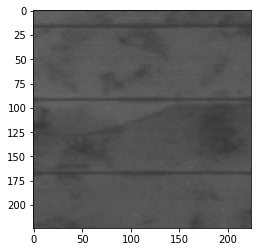

In [108]:
import matplotlib.pyplot as plt
plt.imshow(transform_train(mx.ndarray.array(img)).astype(int).asnumpy())
plt.show()

In [29]:

import sys
sys.path.insert(0, '..')

%matplotlib inline
import gluonbook as gb
import mxnet as mx
from mxnet import autograd, gluon, image, init, nd
from mxnet.gluon import data as gdata, loss as gloss, utils as gutils
import sys
from time import time

def show_images(imgs, num_rows, num_cols, scale=2):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = gb.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

(418L, 418L, 3L)


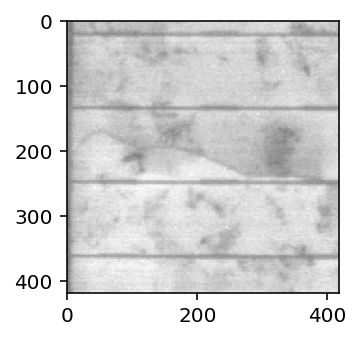

In [30]:
gb.set_figsize()
img = image.imread('./testAUg.jpg')
gb.plt.imshow(img.asnumpy())
print(img.shape)

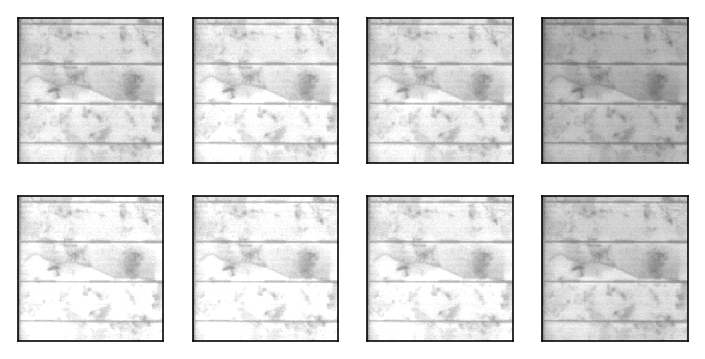

In [22]:

apply(img, gdata.vision.transforms.RandomBrightness(0.2))

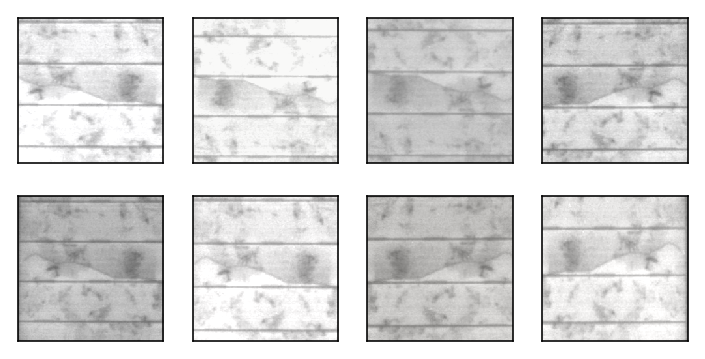

In [54]:
apply(img,transforms.Compose(
    [transforms.Resize(250),
    transforms.RandomResizedCrop((224,224), scale=(0.8, 1.0), ratio=(0.8, 1.2), interpolation=1),
    transforms.RandomFlipLeftRight(),
    transforms.RandomFlipTopBottom(),
    transforms.RandomBrightness(0.2),
    transforms.RandomLighting(0.2),
    transforms.RandomContrast(0.2)
    ]))

# 测试

('total data is', 536)
[9.9031281e-01 9.6866004e-03 5.9673874e-07]


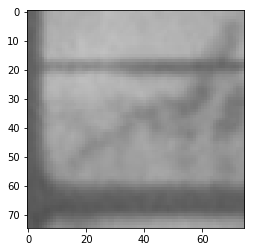

[9.9999654e-01 3.5145899e-06 7.8704074e-09]


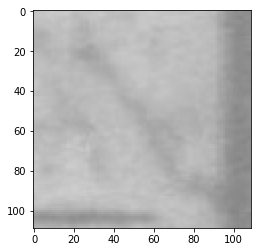

[9.2566299e-01 7.4336633e-02 2.8546663e-07]


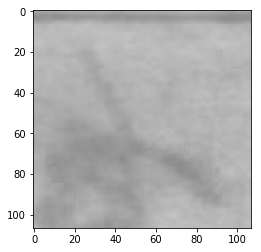

[9.8133904e-01 1.8656259e-02 4.7004014e-06]


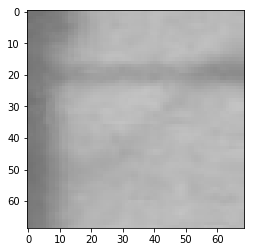

[9.8537529e-01 1.4624695e-02 2.2101786e-11]


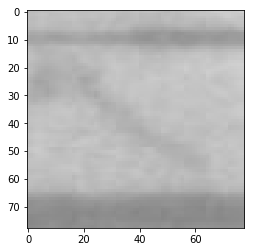

[9.9768293e-01 2.3170921e-03 2.6523322e-10]


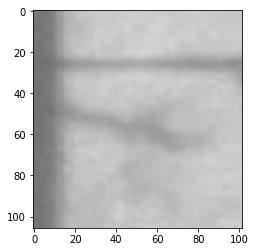

[9.9999249e-01 1.3351190e-06 6.2041127e-06]


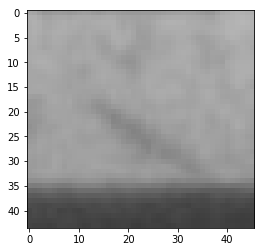

[9.9724674e-01 2.7518126e-03 1.4709212e-06]


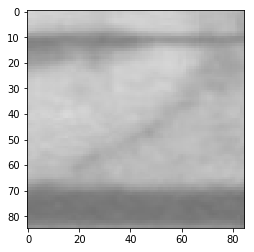

[5.2200729e-01 4.7799265e-01 8.1200902e-08]


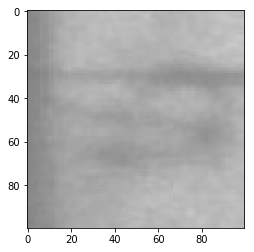

[9.2566299e-01 7.4336633e-02 2.8546663e-07]


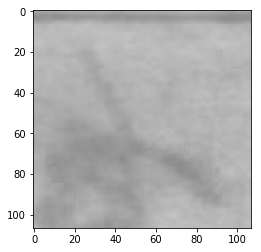

[9.8980063e-01 1.0199127e-02 2.3331205e-07]


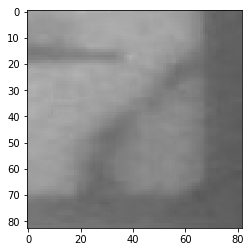

[9.5465434e-01 4.5342952e-02 2.6914124e-06]


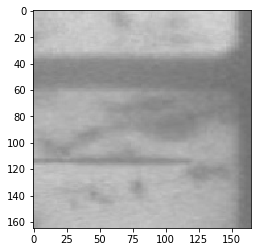

[9.8537529e-01 1.4624695e-02 2.2101786e-11]


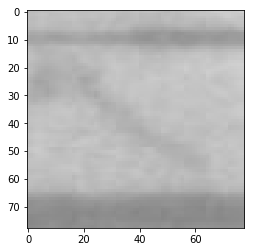

[8.7335789e-01 1.2664174e-01 3.4003281e-07]


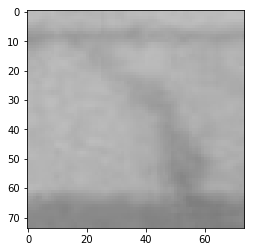

[9.9756575e-01 3.6710813e-07 2.4338644e-03]


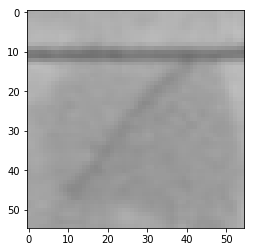

[6.9169647e-01 3.0830351e-01 1.2563637e-09]


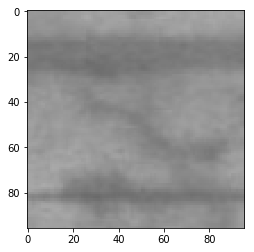

[9.9768293e-01 2.3170921e-03 2.6523322e-10]


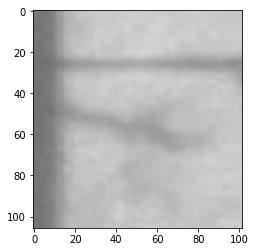

[9.8643494e-01 1.3563623e-02 1.4018340e-06]


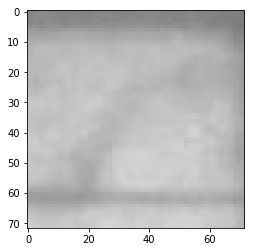

[9.9998999e-01 9.7420480e-06 1.9842167e-07]


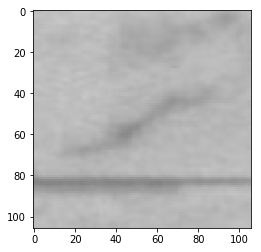

[1.8830526e-08 6.0511007e-10 1.0000000e+00]


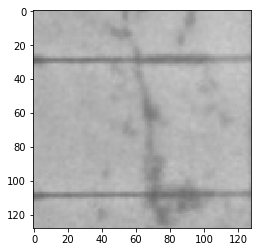

[9.9997938e-01 2.0661693e-05 5.7021154e-08]


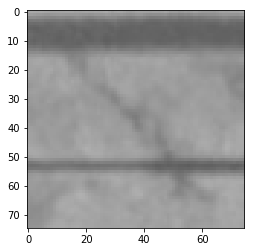

[9.0693378e-01 9.3066163e-02 8.8033296e-11]


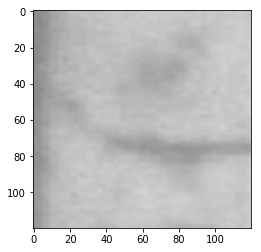

[9.8083109e-01 1.9168891e-02 5.9814637e-10]


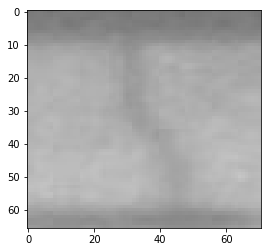

[5.3882813e-01 3.1172309e-05 4.6114078e-01]


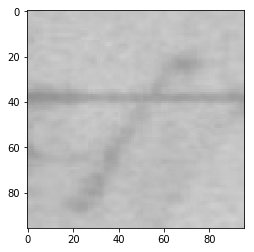

[6.5870202e-01 3.4097412e-01 3.2384036e-04]


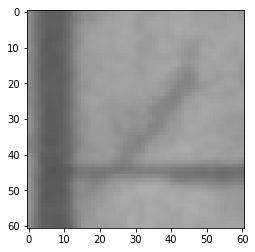

[9.9999583e-01 1.6199982e-08 4.1862727e-06]


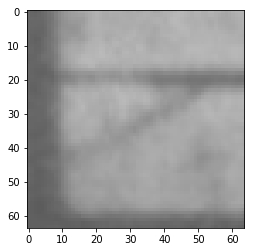

[9.9993515e-01 6.4391745e-05 4.5529089e-07]


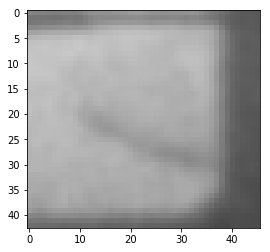

[9.7360051e-01 2.6399525e-02 5.6274807e-10]


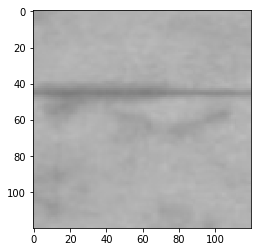

[9.9997938e-01 2.0661693e-05 5.7021154e-08]


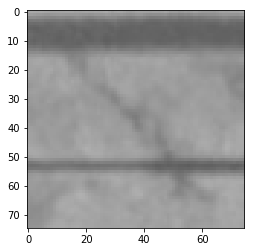

[9.9996853e-01 3.1127307e-05 3.3584465e-07]


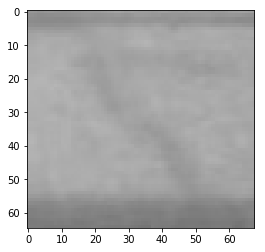

[9.5169663e-01 4.8303377e-02 1.6016109e-08]


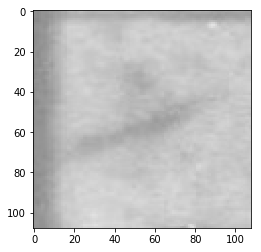

[9.9995017e-01 4.9829203e-05 1.5999578e-09]


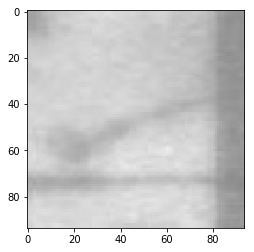

[9.9972886e-01 2.7103673e-04 1.4296633e-07]


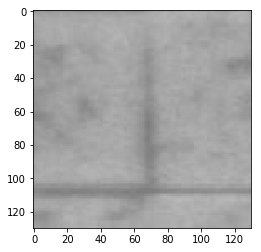

[1.0000000e+00 1.6155031e-08 4.5838220e-08]


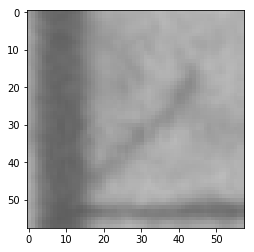

[9.7149390e-01 2.8503357e-02 2.8099096e-06]


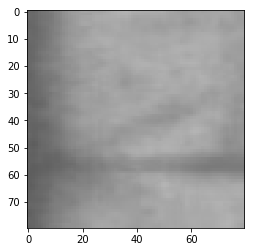

[5.5720437e-01 4.4279549e-01 1.1710943e-07]


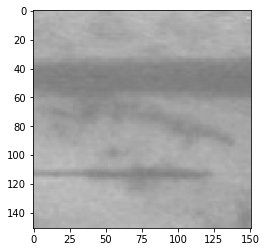

[9.9998951e-01 5.6073277e-06 4.9250407e-06]


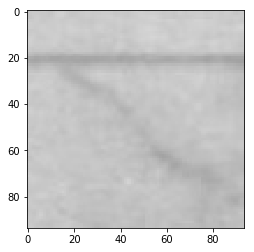

[5.4169416e-01 4.5825276e-01 5.3069831e-05]


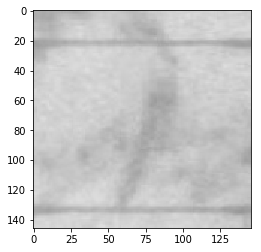

[2.4600799e-01 2.2234037e-05 7.5396979e-01]


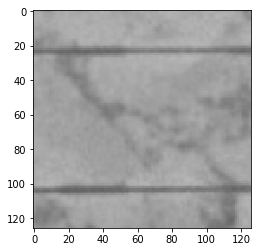

[9.9854434e-01 1.4526938e-03 3.0232088e-06]


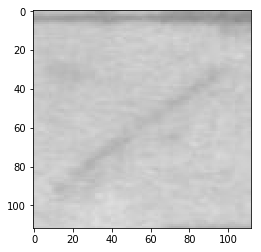

[6.0088110e-01 3.9911240e-01 6.5203094e-06]


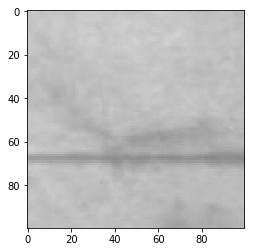

[9.7831476e-01 2.1663884e-02 2.1343905e-05]


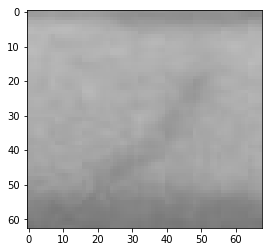

[5.6326706e-02 1.2384061e-04 9.4354951e-01]


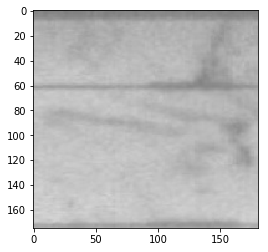

[0.99097437 0.00175985 0.00726585]


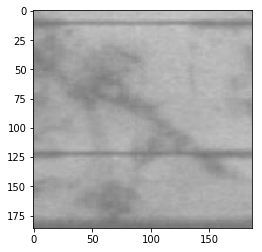

[0.9963052  0.00112147 0.00257336]


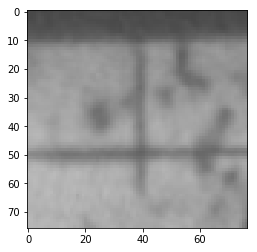

[9.8362374e-01 1.6376227e-02 7.3878215e-10]


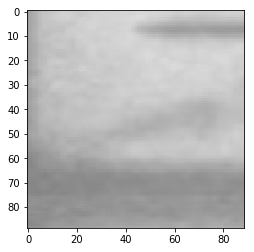

[0.505767   0.48933327 0.00489978]


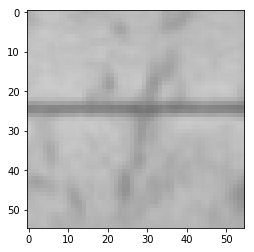

[9.9415499e-01 5.8420338e-03 2.9998696e-06]


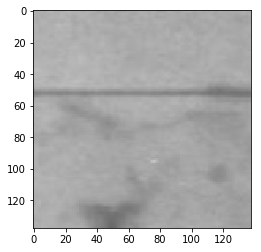

[9.9959916e-01 4.0068207e-04 1.1142153e-07]


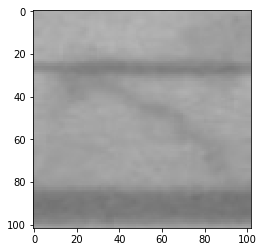

[9.9999893e-01 8.1669256e-08 9.2196359e-07]


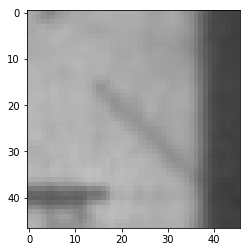

[9.7149390e-01 2.8503357e-02 2.8099096e-06]


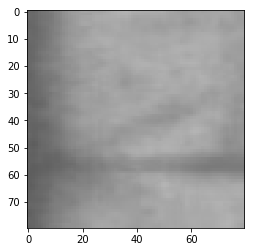

[9.4694263e-01 5.3057231e-02 1.5956157e-07]


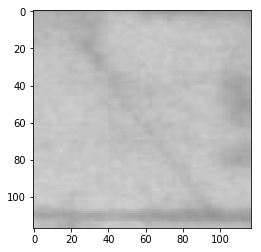

[9.9108291e-01 8.9166975e-03 3.2259132e-07]


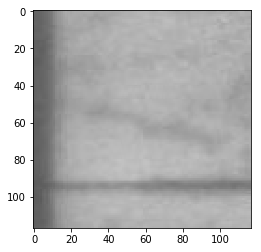

[0.5283831  0.46908852 0.00252834]


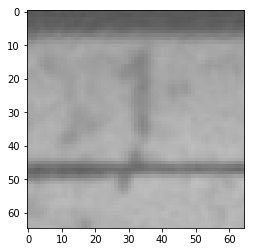

[0.78080475 0.03975414 0.17944114]


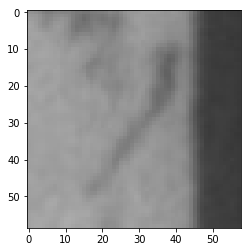

[9.8699099e-01 8.9230474e-05 1.2919867e-02]


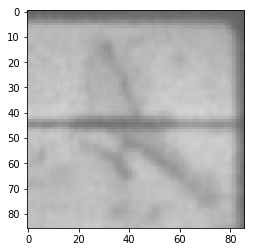

[7.8939509e-01 2.1060495e-01 8.9310026e-09]


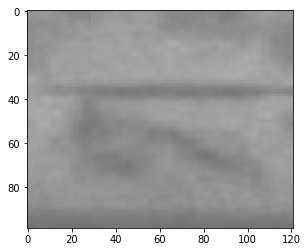

[9.9996984e-01 2.9941299e-05 2.1865280e-07]


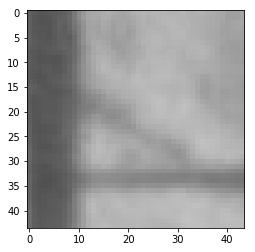

[6.465000e-01 3.535000e-01 7.933558e-12]


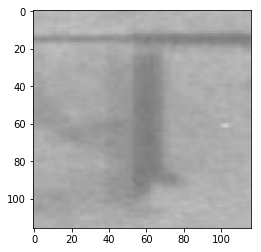

[6.3651568e-01 3.6347935e-01 5.0285989e-06]


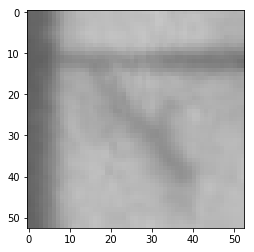

[7.0358151e-01 2.9641852e-01 6.6516070e-10]


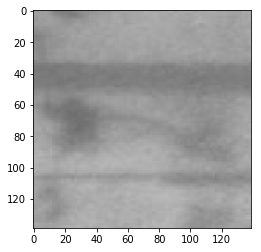

[9.88380313e-01 1.16003575e-02 1.93647902e-05]


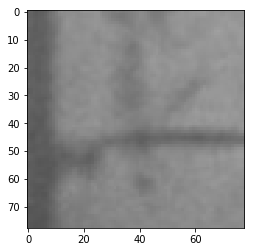

[9.7612554e-01 2.3845676e-02 2.8877061e-05]


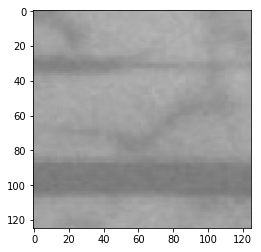

[9.9999917e-01 9.7326186e-08 7.7251900e-07]


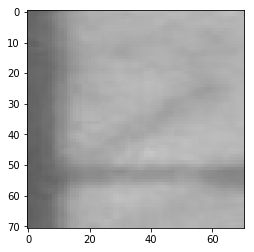

[0.996176   0.00272091 0.00110316]


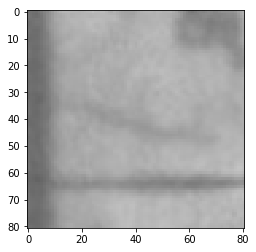

[0.00143956 0.45371777 0.54484266]


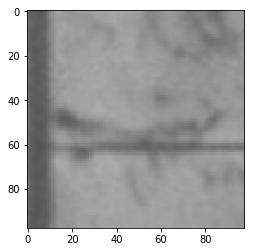

[9.9997127e-01 2.8597651e-05 9.5529032e-08]


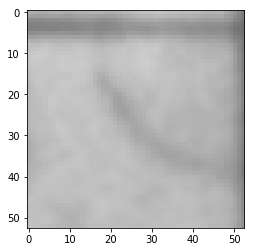

[9.9988973e-01 5.9881881e-05 5.0366485e-05]


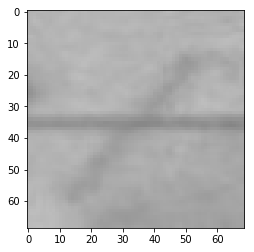

[9.9998176e-01 1.8289236e-05 1.7335767e-08]


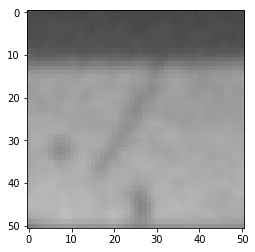

[0.0414595  0.4614026  0.49713787]


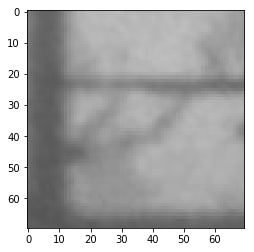

[9.939354e-01 6.063906e-03 7.005289e-07]


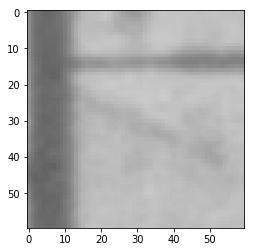

[9.9609900e-01 3.9002404e-03 6.5677131e-07]


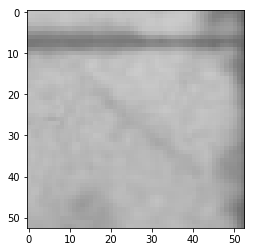

[9.8004854e-01 1.9950766e-02 6.4343112e-07]


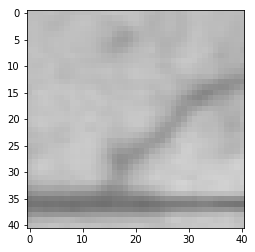

[1.0000000e+00 1.6155031e-08 4.5838220e-08]


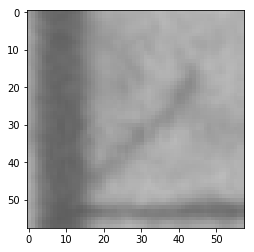

[8.6964518e-01 1.3035482e-01 3.4851761e-09]


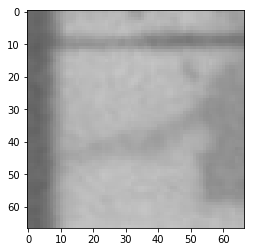

[0.5657827  0.4058729  0.02834437]


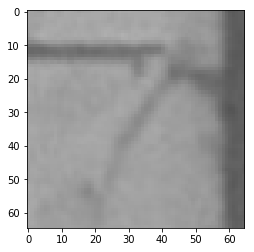

[9.848438e-01 1.505081e-02 1.053689e-04]


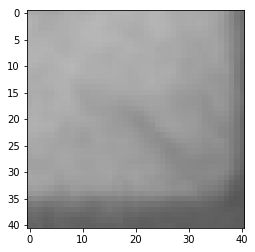

[0.8485456  0.07779065 0.07366373]


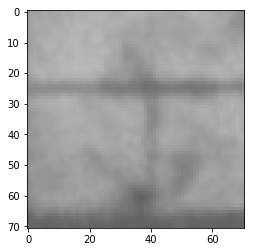

[9.9281996e-01 7.1788304e-03 1.2178791e-06]


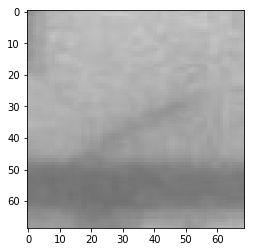

[9.9971074e-01 2.8614217e-04 3.0990907e-06]


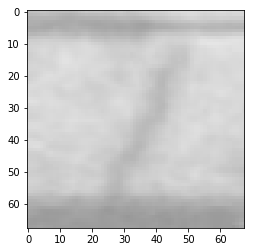

[9.9997127e-01 2.8597651e-05 9.5529032e-08]


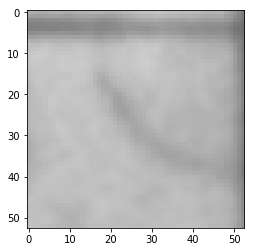

[7.2168928e-01 2.7831069e-01 1.6357386e-10]


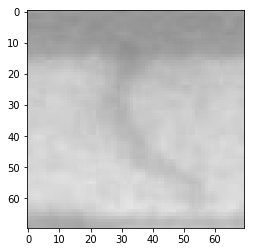

[0.0414595  0.4614026  0.49713787]


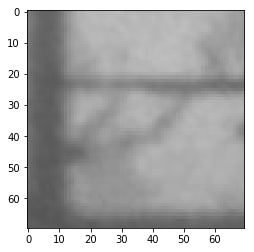

[9.9998236e-01 1.7642438e-05 1.2572429e-08]


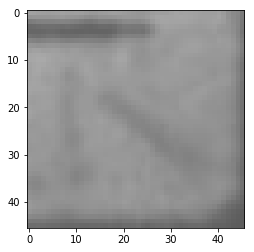

[0.00599632 0.12569652 0.8683072 ]


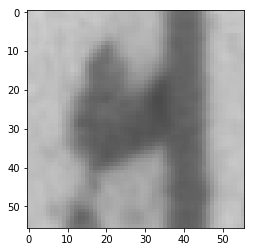

[9.3246490e-01 6.7534886e-02 2.5656868e-07]


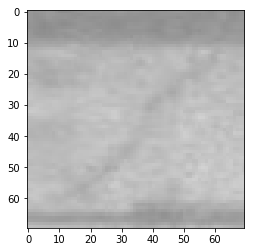

[5.8503926e-01 4.1493326e-01 2.7471744e-05]


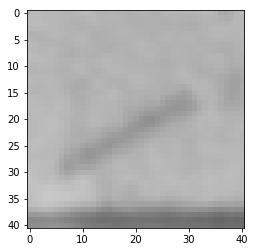

[5.1861203e-01 4.8135841e-01 2.9553565e-05]


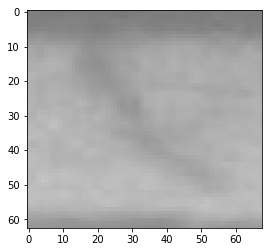

[9.4125801e-01 5.8724195e-02 1.7895225e-05]


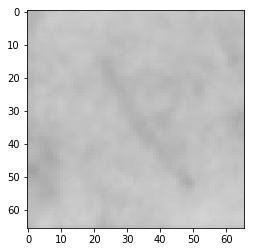

[0.5657827  0.4058729  0.02834437]


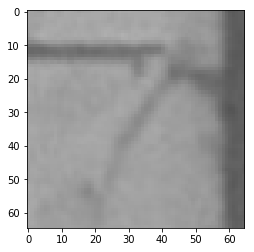

[7.1612650e-01 2.8387347e-01 1.0929186e-08]


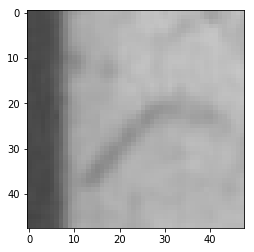

[9.9995816e-01 3.7177771e-05 4.6749665e-06]


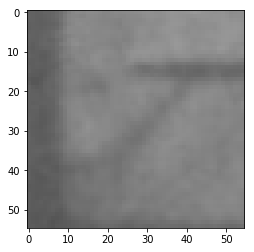

[2.2011955e-08 1.3587895e-01 8.6412102e-01]


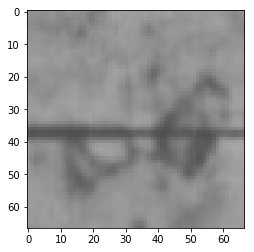

[9.985499e-01 1.448955e-03 1.232373e-06]


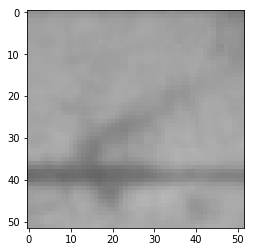

[9.9999928e-01 5.6981083e-08 6.6553150e-07]


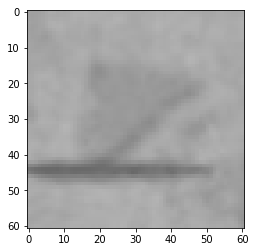

[9.9756575e-01 3.6710813e-07 2.4338644e-03]


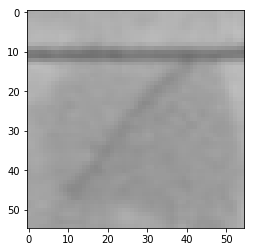

[9.939354e-01 6.063906e-03 7.005289e-07]


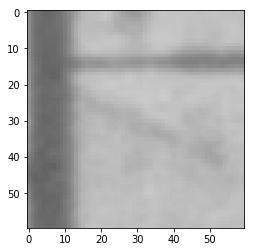

[9.9999583e-01 1.6199982e-08 4.1862727e-06]


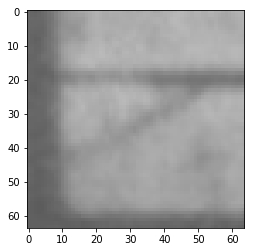

('count ', 98)


In [13]:

import cv2
import glob

import mxnet as mx
import numpy as np
import os, time, shutil
import matplotlib.pyplot as plt
from mxnet import gluon, image, init, nd
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.data.vision import transforms
from gluoncv.utils import makedirs

import time
import os 
import shutil

%matplotlib inline

from scipy import stats


os.environ['MXNET_CUDNN_AUTOTUNE_DEFAULT'] = str(0)

# aug = transforms.Compose([
#     transforms.Resize(250),
#     transforms.RandomResizedCrop((224,224), scale=(0.8, 1.0), ratio=(0.8, 1.2), interpolation=1),
#     transforms.RandomFlipLeftRight(),
#     transforms.RandomFlipTopBottom(),
#     transforms.RandomBrightness(0.2),
#     transforms.RandomLighting(0.2),
#     transforms.RandomContrast(0.2),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#  ])


aug  = transforms.Compose([    
    transforms.Resize(270),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

])


dealNum = 4
classNum = 2
gpuNum = 0

ctx = [mx.gpu(gpuNum)]
model_name = "resnet50_v2"
file_name = "/xuan/data/AB_PREDICT_RESULT/TESTRESULTFORTRANS/modelData4/model/model_final3yinlie.params"
# file_name = "/xuan/data/yinlie_mixed_type/model/model_final.params"
finetune_net = gluon.model_zoo.vision.get_model(model_name, pretrained=False)

with finetune_net.name_scope():
    finetune_net.output = nn.Dense(classNum)
finetune_net.load_params(file_name,ctx= ctx[0])


yinlie_newData = [file for file in glob.iglob('/xuan/data/AB_PREDICT_RESULT/TESTRESULTFORTRANS/modelData4/datasets/data/N_yinlie/*.jpg')]
falselist = []
print('total data is',len(yinlie_newData))
count = 0
results = []

# !rm -rf /xuan/data/AB_PREDICT_RESULT/TESTRESULTFORTRANS/modelData5/errorData/AB2jia/
# !mkdir  /xuan/data/AB_PREDICT_RESULT/TESTRESULTFORTRANS/modelData5/errorData/AB2jia/
# !mkdir /xuan/data/AB_PREDICT_RESULT/TESTRESULTFORTRANS/modelData1/errorData/yinlie_2_not_very_true/
# !mkdir /xuan/data/AB_PREDICT_RESULT/TESTRESULTFORTRANS/modelData1/errorData/yinlie_2_true/


count  = 0
for idx , testfile in enumerate( yinlie_newData):

    img = cv2.imread(testfile)
    testimg    = mx.ndarray.array(img)
    

    imgaug    = aug(testimg).expand_dims(axis=0)
    
    imgaug = imgaug.as_in_context(mx.gpu(gpuNum))
    res    = finetune_net(imgaug)
    output = nd.softmax(res).asnumpy().flatten()
    
    output_cls = np.argmax(output)
    prob = output[output_cls]
    results.append(output_cls)


#     if  output_cls == 1  :
#         shutil.copy(testfile,'/xuan/data/AB_PREDICT_RESULT/TESTRESULTFORTRANS/modelData5/errorData/AB2jia/' + 'prob' + str(output) + testfile.split('/')[-1])
#     if output_cls == 2:
#         shutil.copy(testfile,'/xuan/data/AB_PREDICT_RESULT/TESTRESULTFORTRANS/modelData1/errorData/yinlie_2_true/' + 'prob' + str(output)  +testfile.split('/')[-1])
        
#     if output_cls == 2:
#         shutil.copy(testfile,'/xuan/data/AB_PREDICT_RESULT/TESTRESULT/2B_3/' + testfile.split('/')[-1])
#     print(output)
    if  output_cls != 1 :
        print(output)
        plt.imshow(img)
        plt.show()
        count +=1
print("count ",count)

In [27]:
output

array([9.9722147e-01, 6.2650943e-04, 2.1517603e-03, 2.7135385e-07],
      dtype=float32)

In [24]:
# !cd  /xuan/data/AB_PREDICT_RESULT/TESTRESULTFORTRANS/modelData1/ && zip  -r  errorData.zip ./errorData/

In [30]:
from collections import Counter
Counter(results)
# results

Counter({0: 339, 1: 447, 2: 79, 3: 17})

In [97]:
66/(734 + 59 + 66.0)

0.07683352735739232

In [40]:
40/1300.0

0.03076923076923077

In [29]:
16 + 248 + 54

318

In [37]:
318 / 2700.0


0.11777777777777777

In [15]:
([1,2,3,4]).to

AttributeError: 'list' object has no attribute 'str'